##                                          Optimisation convexe partie 2

Alae eddine EL hmimdi -
Aymeric ALyxee -
Marion Claus

## 1.1  Méthode de Newton

In [ ]:
import numpy as np
import pandas as pd
from scipy import misc 
import matplotlib.pyplot as plt

In [3]:
class visualisation:
    def __call__(self,testfunction,iters,iters_dir):
        if testfunction.nb_params == 1:
            self.plotTwoD(testfunction,iters,iters_dir)
        elif testfunction.nb_params == 2:
            self.plotThreeDContour(testfunction,iters,iters_dir)
    def plotTwoD(self,testfunction,iters,iters_dir):
        f = testfunction.value
        fig,ax = plt.subplots(figsize=(16,9))
        x = np.linspace(-10,10,400) # to be changed  !!!!
        #ax.set_ylim(0,200)  # to be changed  !!!!
        ax.plot(x,f(x),label="objective function: {}".format(testfunction.gamma))
        #afficher les iterré de la descent
        if iters.all() != None:
            f = testfunction.value
            iters_reshape = iters.reshape(iters.shape[0], 1)
            ax.plot(iters_reshape, f(iters_reshape), 'r.', label="Iterates")
            ax.quiver(iters_reshape, 
                      f(iters_reshape), 
                      iters_dir,
                      -1, 
              color='r', scale=None, width=0.002, headwidth=5, headlength=10)
            ax.set_title("Gradient Descent for dim 1")
        ax.legend()
    def plotThreeDContour(self,testfunction,iters,iters_dir):
        f = testfunction.value
        nb_pts, x_mi, x_ma, y_mi, y_ma = 200, -2, 2, -2, 2
        fig,ax = plt.subplots(figsize=(15,15))
        x, y = np.linspace(x_mi, x_ma, nb_pts), np.linspace(x_mi, x_ma, nb_pts)
        X, Y = np.meshgrid(x, y)
        x_y = np.vstack([X.reshape(1, -1), Y.reshape(1, -1)]).reshape(1, 2, -1)
        ax.set_xlim(x_mi,x_ma)
        ax.set_ylim(y_mi,y_ma)
        ax.contour(X,Y,f(x_y).reshape(nb_pts, -1), 15)
        if iters.all() != None:
            f = testfunction.value
            X_iters_reshape = iters[:,0].reshape(-1, 1)
            Y_iters_reshape  = iters[:,1].reshape(-1, 1)
            ax.plot(X_iters_reshape, Y_iters_reshape, 'r.', label="Iterates")
            ax.quiver(X_iters_reshape,
                      Y_iters_reshape,
                      iters_dir[:,0].reshape(-1, 1), 
                      iters_dir[:,1].reshape(-1, 1), 
              color='r', scale=None, width=0.002, headwidth=5, headlength=10)
            ax.set_title("Gradient Descent for dim 2")
        ax.legend()
    def plotThreeD(self,testfunction,iters,iters_dir):
        self.plotThreeDContour(testfunction,iters,iters_dir)
        f = testfunction.value
        nb_pts, x_mi, x_ma, y_mi, y_ma = 200, -20, 20, -20, 20

        x, y = np.linspace(x_mi, x_ma, nb_pts), np.linspace(x_mi, x_ma, nb_pts)
        X, Y = np.meshgrid(x, y)
        x_y = np.vstack([X.reshape(1, -1), Y.reshape(1, -1)]).reshape(1, 2, -1)
        #ax.set_xlim(x_mi,x_ma)
        #ax.set_ylim(y_mi,y_ma)        
        fig = plt.figure(figsize=(15,15))
        ax = Axes3D(fig) #<-- Note the difference from your original code...
        
        cset = ax.contour(X,Y,f(x_y).reshape(nb_pts, -1), 16, extend3d=True)
        ax.clabel(cset, fontsize=9, inline=1)

## Question 1-1: Génération des problèmes d’optimisations sans contraintes.

Afin de pouvoir tester nos différentes implémentations, on générer un ensemble de problèmes d'optimisation sans contrainte convexe et non convexe. Dans nos tests, on a quatre familles de fonctions: 

$f : \mathbb{R} \to \mathbb{R}$.

$f : \mathbb{R^2} \to \mathbb{R}$.

$f : \mathbb{R^3} \to \mathbb{R}$.

$f : \mathbb{R^4} \to \mathbb{R}$.

In [15]:
class test_function():
    def __init__(self, name, func,grad,hess, dim, nb_params,constraints=None, convex=None, HCN=None):
        self.name = name
        self.value = func
        self.grad = grad
        self.hess = hess
        self.gamma = 1
        self.dim = dim
        self.constraints = constraints
        self.nb_params = nb_params
        self.constraints = constraints
        self.convex = convex
        self.HCN = HCN
    def SetGamma(self,number):
        self.value = lambda x: self.func(x,number)
        self.gamma = 1
        


quad_I_c6 = {
    "name": "quad_I_c6",
    "dim" : 1,
    "nb_params" : 1,
    "convex" : True, 
    "func" : (lambda x: 2*(x**4) + x + 1),
    "grad" : (lambda x: 8*x**3 + 1),
    "hess" : (lambda x: np.array([24*x**2]) ),
    "HCN"   : 1
}

quad_I_c5 = {
    "name": "quad_I_c5",
    "dim" : 1,
    "nb_params" : 1,
    "convex" : True, 
    "func" : (lambda x: 5*(x**4) + (x**2) -17),
    "grad" : (lambda x: 20*x**3 + 2*x ),
    "hess" : (lambda x: np.array([60*x**2 +2]) ),
    "HCN"   : 1
}

quad_I_c2 = {
    "name": "quad_I_c2",
    "dim" : 1,
    "nb_params" : 1, 
    "convex" : True,
    "func" : (lambda x: 5*(x**4) + (x**2) -17),
    "grad" : (lambda x: 20*x**3 + 2*x ),
    "hess" : (lambda x: np.array([60*x**2 +2]) ),
    "HCN"   : 1
}

quad_I_c3 = {
    "name": "quad_I_c3",
    "dim" : 1,
    "nb_params" : 1,
    "convex" : True, 
    "func" : (lambda x: 2*(x**2) - x + 1),
    "grad" : (lambda x: x*4 + 1),
    "hess" : (lambda x: np.array([4]) ),
    "HCN"   : 1
}

quad_I_c = {
    "name": "quad_I_c",
    "dim" : 1,
    "nb_params" : 1,
    "convex" : True,
    "func" : (lambda x: x**2 - 5*x + 1),
    "grad" : (lambda x:2*x - 5 ),
    "hess" : (lambda x: np.array([2]).reshape(1,1) ),
    "HCN"   : 1
}

quad_I_c4 = {
    "name": "quad_I_c4",
    "dim" : 1,
    "nb_params" : 1,
    "convex" : False,
    "func" : (lambda x: (x**6) - (x**3) + 1),
    "grad" : (lambda x: 6*x**5 - 3*x**2 ),
    "hess" : (lambda x: np.array([30*x**4 - 6*x])),
    "HCN"   : 1
}



quad_I_nc = {
    "name": "quad_I_nc",
    "dim" : 1,
    "nb_params" : 1,
    "convex" : True,
    "func" : (lambda x: x**6+ 5*x**4 + 1),
    "grad" : (lambda x: 6*x**5 - 12*x**3 ),
    "hess" : (lambda x: np.array([30*x**4 - 36*x**2]).reshape(1,1) ),
    "HCN"   : 1
}


quad_two_c = {
    "name": "quad_two_c",
    "dim" : 1,
    "nb_params" : 2,
    "convex" : True,
    "func" : (lambda x: (x[:,0]**2) + x[:,1]**2 + 1),
    "grad" : (lambda x: np.array([2*x[:,0],2*x[:,1]]).reshape(-1,1)),
    "hess" : (lambda x: np.diag([2,2])),
    "HCN"   : 1
}

quad_two_c2 = {
    "name": "quad_two_c2",
    "dim" : 1,
    "nb_params" : 2,
    "convex" : False,
    "func" : (lambda x: (x[:,0]**2) * x[:,1]**2),
    "grad" : (lambda x: np.array([2*x[:,0] * x[:,1]**2  ,  2*x[:,1]*(x[:,0]**2) ]).reshape(-1,1)),
    "hess" : (lambda x: np.array([[2* x[:,1]**2,4*x[:,0] * x[:,1] ],
                                 [4*x[:,1]*(x[:,0]),2*(x[:,0]**2)]])),
    "HCN"   : 1
}


quad_two_c3 = {
    "name": "quad_two_c3",
    "dim" : 1,
    "nb_params" : 2,
    "convex" : True,
    "func" : (lambda x: (x[:,0]**4) + x[:,1]**4 + 3),
    "grad" : (lambda x: np.array([4*x[:,0]**3,4*x[:,1]**3]).reshape(-1,1)),
    "hess" : (lambda x: np.diag([12*x[0,0]**2,12*x[0,1]**2])),
    "HCN"   : 1
}

quad_two_c4 = {
    "name": "quad_two_c4",
    "dim" : 1,
    "nb_params" : 2,
    "convex" : True,
    "func" : (lambda x: (x[:,0]**2) + x[:,1]**4),
    "grad" : (lambda x: np.array([2*x[:,0],  4*(x[:,1]**3) ]).reshape(-1,1)),
    "hess" : (lambda x: np.diag([2 , 12 *x[0,1]**2 ])),
    "HCN"   : 1
}


quad_two_c5 = {
    "name": "quad_two_c5",
    "dim" : 1,
    "nb_params" : 2,
    "convex" : True,
    "func" : (lambda x: ((x[:,0]-3)**2 + (x[:,1]- 4)**4)),
    "grad" : (lambda x: np.array([2*(x[:,0]-3),
                                  4*(x[:,1]- 4)**3]).reshape(-1,1)),
    "hess" : (lambda x: np.diag([2,12*(x[0,1]- 4)**2]).reshape(2,2)),
    "HCN"   : 1
}

quad_two_c6 = {
    "name": "quad_two_c6",
    "dim" : 1,
    "nb_params" : 2,
    "convex" : True,
    "func" : (lambda x: x[:,0]**2 * x[:,1]**2 + x[:,0]**2),
    "grad" : (lambda x: np.array([2*x[:,0] + 2*x[:,0] * x[:,1]**2  ,
                                  2*x[:,1]*x[:,0]**2 ]).reshape(-1,1)),
    "hess" : (lambda x: np.array([[2 + 2*x[:,1]**2   ,   2*x[:,0] * x[:,1] ],
                                 [4*x[:,1]*(x[:,0])  ,   2*(x[:,0]**2)]])),
    "HCN"   : 1
}


quad_two_c7 = {
    "name": "quad_two_c7",
    "dim" : 1,
    "nb_params" : 2,
    "convex" : True,
    "func" : (lambda x: (4*x[:,0]**4) + 3*x[:,1]**4 + 3),
    "grad" : (lambda x: np.array([16*x[:,0]**3,12*x[:,1]**3]).reshape(-1,1)),
    "hess" : (lambda x: np.diag([48*x[0,0]**2,36*x[0,1]**2])),
    "HCN"   : 1
}

quad_two_c8 = {
    "name": "quad_two_c8",
    "dim" : 1,
    "nb_params" : 3,
    "convex" : True,
    "func" : (lambda x: (x[:,0]**2 + x[:,1]**2 + x[:,2]**2 + 5)),
    "grad" : (lambda x: np.array([x[:,0]*2,
                                  x[:,1]*2,
                                  x[:,2]*2]).reshape(-1,1)),
    "hess" : (lambda x:  np.diag([2,2,2]).reshape(3,3)),
    "HCN"   : 1
}
quad_two_c9 = {
    "name": "quad_two_c9",
    "dim" : 1,
    "nb_params" : 4,
    "convex" : True,
    "func" : (lambda x: (2*x[:,0]**2 + 2*x[:,1]**2 + 2*x[:,2]**2 + 2*x[:,3]**2)),
    "grad" : (lambda x: np.array([x[:,0]*4,
                                  x[:,1]*4,
                                  x[:,2]*4,
                                  x[:,3]*4]).reshape(-1,1)),
    "hess" : (lambda x:  np.diag([4,4,4,4]).reshape(4,4)),
    "HCN"   : 1
}


quad_two_nc = {
    "name": "quad_two_nc",
    "dim" : 1,
    "nb_params" : 2,
    "convex" : False,
    "func" : (lambda x: (-x[:,0]**3) + x[:,1]**3 + 1),
    "grad" : (lambda x: np.array([-3*x[:,0]**2,3*x[:,1]**2]).reshape(-1,1)),
    "hess" : (lambda x: np.diag([-6*x[0,0],6*x[0,1]])),
    "HCN"   : 1
}

quad_I = test_function(**quad_I_c)
quad_I2 = test_function(**quad_I_nc)
quad_I3 = test_function(**quad_I_c2)
quad_I4 = test_function(**quad_I_c3)
quad_I5 = test_function(**quad_I_c4)
quad_I6 = test_function(**quad_I_c5)
quad_I7 = test_function(**quad_I_c6)


quad_two = test_function(**quad_two_c)
quad_two2 = test_function(**quad_two_c2)
quad_two3 = test_function(**quad_two_nc)

quad_two4 = test_function(**quad_two_c3)
quad_two5 = test_function(**quad_two_c4)
quad_two6 = test_function(**quad_two_c5)
quad_two7 = test_function(**quad_two_c6)
quad_two8 = test_function(**quad_two_c7)
quad_two9 = test_function(**quad_two_c8)
quad_two10 = test_function(**quad_two_c9)

tests_without_constraint = [quad_I,quad_I2,quad_I3,quad_I4,quad_I5,quad_I6,quad_I7,
                            quad_two,quad_two2,quad_two3,quad_two4,quad_two5,quad_two6,
                            quad_two7,quad_two8,quad_two9,quad_two10]

## Question 1-2. Implémentation et test de la méthode de Newton contre le test set que nous avons généré.

la méthode de Newton est une méthode itérative pour trouver les racines d'une fonction différentiable f, qui sont des solutions à l'équation f(x) = 0.

Ainsi, la méthode de Newton est appliquée à la dérivée f ′ d'une fonction supposé deux fois différentiable pour trouver les racines de la dérivée (solutions à $\nabla$f(x) = 0). Ces solutions peuvent être les minima, maxima ou points en selle.

In [43]:
from scipy.misc import derivative
from numpy.linalg import inv,norm
import numpy as np


def Newton(function,x0,eps= 1e-6,maxiter=1000,viz = True):
    f = function.value
    x = np.array(x0,dtype='float64').reshape(1,function.nb_params)
    Gr = function.grad(x).reshape(function.nb_params,1)
    hess = function.hess(x).reshape(function.nb_params,function.nb_params)
    deltaX = -inv(hess) @ Gr
    deltaX = deltaX.reshape(1,-1)
    it = 0
    iters_dir,iters = deltaX,x
    norme = norm(Gr.T)/2
    while norme > eps and it < maxiter:
        Gr = function.grad(x).reshape(function.nb_params,1)
        hess = function.hess(x).reshape(function.nb_params,function.nb_params)
        deltaX = -inv(hess) @ Gr
        deltaX = deltaX.reshape(1,-1)
        x += deltaX
        iters_dir = np.vstack([iters_dir, deltaX])
        iters = np.vstack([iters, x])
        norme = norm(Gr.T)/2
        it += 1
    if viz:
        vis = visualisation()
        #print("iterdir shape:",iters_dir.shape)
        vis(function,iters,iters_dir)
    return x,it

On visualise la methode de newton appliqué au probleme d'optimisation sans contrainte : $f : \mathbb{R} \to \mathbb{R}$.

            argmin[ x² - 5*x + 1  ]

x min:  [[2.5]]
f(x):  [[-5.25]]
it : 2


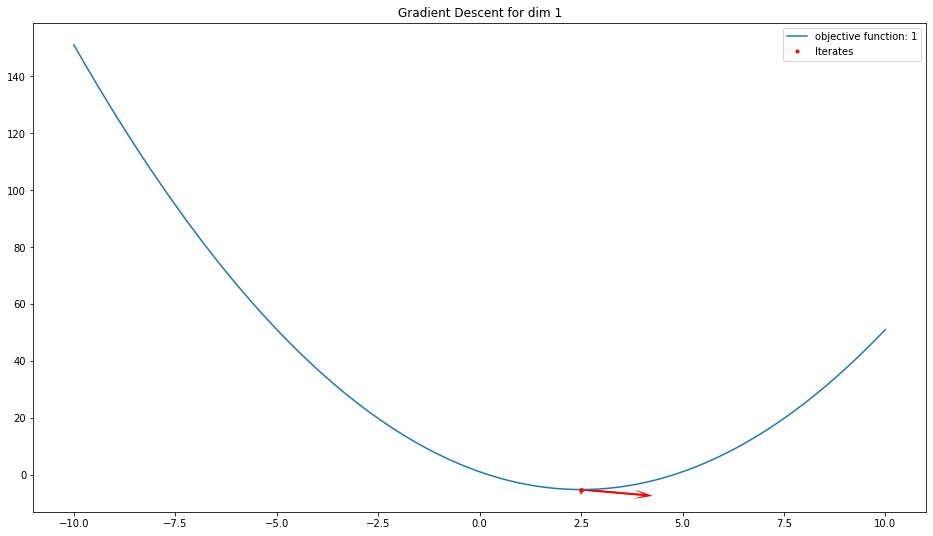

In [44]:
from scipy.optimize import newton
x0 = np.matrix([[-9]]).reshape(1,-1)
maX=1000
toL = 1e-6
x,it = Newton(quad_I,x0=x0,eps=toL,maxiter=maX)
print("x min: ",x)
print("f(x): ",quad_I.value(x))
print("it :",it)

On visualise la methode de newton appliqué au probleme d'optimisation sans contrainte : $f : \mathbb{R^2} \to \mathbb{R}$.

            argmin[ x² - 5*x + 1  ]

x min:  [[-0.00405984  0.00405984]]
f(x):  [[2.71665413e-10]]
it : 19


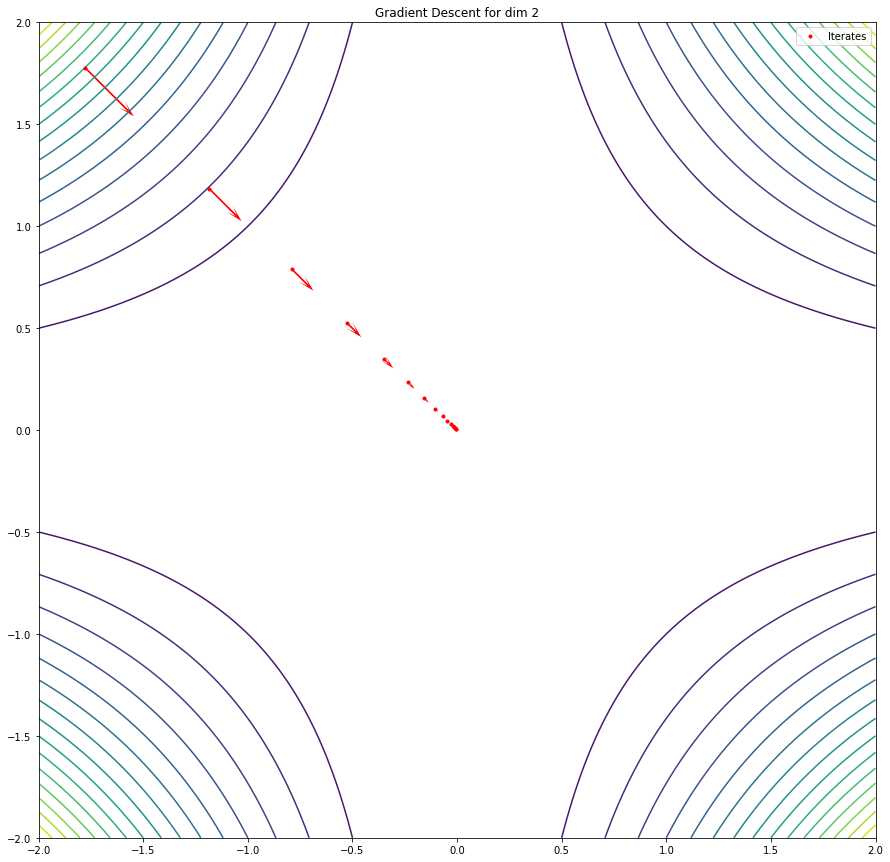

In [18]:
from scipy.optimize import newton

x0 = np.matrix([[-9,9]]).reshape(1,-1)
maX=1000
toL = 1e-6
x,it = Newton(quad_two2,x0=x0,eps=toL,maxiter=maX)
print("x min: ",x.reshape(1,-1))
print("f(x): ",quad_two2.value(x).reshape(1,-1))
print("it :",it)

On créé un Dataframe là où on va stocker les résultats des test de notre méthode de Newton contre le testset que nous avons implémenté :

In [19]:
import pandas as pd
import inspect

def getinitPoint(nb_params):
    return np.ones(nb_params).reshape(nb_params,1)*3

def tostring(func):
    return inspect.getsourcelines(func)[0][0].split('x:')[1].split(',\n')[0]

GD_test_summary = pd.DataFrame(columns=["function","init_pt", "rate", "nb_iter","convexe", "optimal_pt"])

idt = 0
maX=1000
toL = 1e-6
def formater(x,nbparam):
    ret = "("
    for i in range(x.shape[0]- 1):
        ret += str(x[i])
        ret += ","
    ret+=   str(x[x.shape[0]- 1])
    ret += ")"
    return ret
for t_function in tests_without_constraint:
    nbparam = t_function.nb_params 
    initialPoint = getinitPoint(nbparam)
    rate = 0.01
    opt_pt,n_iter = Newton(t_function,x0=initialPoint,eps=toL,maxiter=maX,viz = False)
    GD_test_summary.loc[t_function.name] = pd.Series({"init_pt": formater(initialPoint,nbparam), 
                                                     "rate": rate, 
                                                      "function": tostring(t_function.value), 
                                                     "optimal_pt": formater(opt_pt.reshape(-1,1),nbparam), # point trouvé 
                                                     "nb_iter": n_iter,
                                                      "convexe": t_function.convex }) # nombre d'iteration
    idt += 1
    
GD_test_summary


function  \
quad_I_c                                       x**2 - 5*x + 1)   
quad_I_nc                                    x**6+ 5*x**4 + 1)   
quad_I_c2                               5*(x**4) + (x**2) -17)   
quad_I_c3                                    2*(x**2) - x + 1)   
quad_I_c4                                 (x**6) - (x**3) + 1)   
quad_I_c5                               5*(x**4) + (x**2) -17)   
quad_I_c6                                    2*(x**4) + x + 1)   
quad_two_c                        (x[:,0]**2) + x[:,1]**2 + 1)   
quad_two_c2                           (x[:,0]**2) * x[:,1]**2)   
quad_two_nc                      (-x[:,0]**3) + x[:,1]**3 + 1)   
quad_two_c3                       (x[:,0]**4) + x[:,1]**4 + 3)   
quad_two_c4                           (x[:,0]**2) + x[:,1]**4)   
quad_two_c5                  ((x[:,0]-3)**2 + (x[:,1]- 4)**4))   
quad_two_c6                 x[:,0]**2 * x[:,1]**2 + x[:,0]**2)   
quad_two_c7                   (4*x[:,0]**4) + 3*x[:,1]**4 + 3)   
quad_two_c8           (x[:,0]**2 + x[:,1]**2 + x[:,2]**2 + 5))   
quad_two_c9   (2*x[:,0]**2 + 2*x[:,1]**2 + 2*x[:,2]**2 + 2*...   

                           init_pt  rate nb_iter convexe  \
quad_I_c                    ([3.])  0.01       2    True   
quad_I_nc                   ([3.])  0.01       9    True   
quad_I_c2                   ([3.])  0.01      10    True   
quad_I_c3                   ([3.])  0.01       2    True   
quad_I_c4                   ([3.])  0.01      11   False   
quad_I_c5                   ([3.])  0.01      10    True   
quad_I_c6                   ([3.])  0.01      12    True   
quad_two_c             ([3.],[3.])  0.01       2    True   
quad_two_c2            ([3.],[3.])  0.01      16   False   
quad_two_nc            ([3.],[3.])  0.01      14   False   
quad_two_c3            ([3.],[3.])  0.01      16    True   
quad_two_c4            ([3.],[3.])  0.01      16    True   
quad_two_c5            ([3.],[3.])  0.01      13    True   
quad_two_c6            ([3.],[3.])  0.01      17    True   
quad_two_c7            ([3.],[3.])  0.01      17    True   
quad_two_c8       ([3.],[3.],[3.])  0.01       2    True   
quad_two_c9  ([3.],[3.],[3.],[3.])  0.01       2    True   

                                  optimal_pt  
quad_I_c                             ([2.5])  
quad_I_nc                     ([1.41421356])  
quad_I_c2                 ([7.46447785e-19])  
quad_I_c3                          ([-0.25])  
quad_I_c4                     ([0.79370053])  
quad_I_c5                 ([7.46447785e-19])  
quad_I_c6                           ([-0.5])  
quad_two_c                       ([0.],[0.])  
quad_two_c2      ([0.00456732],[0.00456732])  
quad_two_nc      ([0.00018311],[0.00018311])  
quad_two_c3      ([0.00456732],[0.00456732])  
quad_two_c4              ([0.],[0.00456732])  
quad_two_c5              ([3.],[3.99486177])  
quad_two_c6  ([-9.6555872e-10],[0.25653093])  
quad_two_c7      ([0.00304488],[0.00304488])  
quad_two_c8                 ([0.],[0.],[0.])  
quad_two_c9            ([0.],[0.],[0.],[0.])

## Question 1-3. Comparant notre méthode de Newton aux implémentation de descente de gradient vu en TP.

Toujours dans un Datframe, on va stocker les differents resultats de la methode de Newton et de la descent de gradiant vue en Tp, afin de pouvoir les comparer 

In [20]:
class GD():   
    def __init__(self, ddir=None, rate=None, decay=None, tol=None, max_iter=None):
        self.ddir = ddir if ddir else (lambda x, f, grad, tol: - grad(x, f, tol))
        self.rate = rate if rate else (lambda x, f, dir_x, grad, nb_iter, eta : 0.01)
        self.decay = decay if decay else (lambda x, f, grad, tol: np.linalg.norm(grad(x, f, tol)))
        self.tol = tol if tol else 1e-6
        self.max_iter = max_iter if max_iter else 1000 
    def __call__(self, x, f, grad, verbose=False):
        x = x.reshape(1, -1).astype('float64')
        eta = 0
        n_iter = 0
        dir_x = self.ddir(x, f, grad, self.tol).reshape(1,-1)
        rate_ = self.rate(x, f, dir_x, grad, n_iter, eta)
        delta_x = rate_ * dir_x
        iters, iters_dir = x, delta_x 
        decay_x = self.decay(x, f, grad, self.tol)
        while decay_x > self.tol and n_iter < self.max_iter:
            dir_x = self.ddir(x, f, grad, self.tol).reshape(1,-1)
            rate_ = self.rate(x, f, dir_x, grad, n_iter, eta)
            delta_x =  rate_ * dir_x
            iters = np.vstack([iters, x])
            x = x + delta_x
            iters_dir = np.vstack([iters_dir, delta_x])
            decay_x = self.decay(x, f, grad, self.tol)
            n_iter += 1
        return (x, iters, iters_dir, n_iter) 

In [21]:
import pandas as pd
import inspect


def tostring(func):
    return inspect.getsourcelines(func)[0][0].split('x:')[1].split(',\n')[0]

GD_test_summary = pd.DataFrame(columns=["function","gradient descent optimal_pt", "newton descent optimal_pt",
                                        "gradient descent iter_count", "newton descent iter_count"])

idt = 0
maX=1000
toL = 1e-6
GD_default = GD()

for t_function in tests_without_constraint:
    nbparam = t_function.nb_params 
    initialPoint = getinitPoint(nbparam)
    opt_pt,n_iter = Newton(t_function,x0=initialPoint,eps=toL,maxiter=maX,viz = False)    
    opt_pt2, _, _, n_iter2 = GD_default(initialPoint, (lambda x : t_function.value(x)), 
                                             (lambda x, f, tol : t_function.grad(x)), True)
    GD_test_summary.loc[t_function.name] = pd.Series({"gradient descent optimal_pt": formater(opt_pt2.reshape(-1,1),nbparam), # point trouvé 
                                                     "gradient descent iter_count": n_iter2,
                                                      
                                                      "function": tostring(t_function.value), 
                                                     "newton descent optimal_pt": formater(opt_pt.reshape(-1,1),nbparam), # point trouvé 
                                                     "newton descent iter_count": n_iter }) # nombre d'iteration
    idt += 1
    
GD_test_summary


/home/alae/.conda/envs/scia/lib/python3.7/site-packages/ipykernel_launcher.py:94: RuntimeWarning: overflow encountered in power
/home/alae/.conda/envs/scia/lib/python3.7/site-packages/ipykernel_launcher.py:94: RuntimeWarning: invalid value encountered in subtract
/home/alae/.conda/envs/scia/lib/python3.7/site-packages/ipykernel_launcher.py:81: RuntimeWarning: overflow encountered in power
/home/alae/.conda/envs/scia/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in add
/home/alae/.conda/envs/scia/lib/python3.7/site-packages/ipykernel_launcher.py:217: RuntimeWarning: overflow encountered in square


function  \
quad_I_c                                       x**2 - 5*x + 1)   
quad_I_nc                                    x**6+ 5*x**4 + 1)   
quad_I_c2                               5*(x**4) + (x**2) -17)   
quad_I_c3                                    2*(x**2) - x + 1)   
quad_I_c4                                 (x**6) - (x**3) + 1)   
quad_I_c5                               5*(x**4) + (x**2) -17)   
quad_I_c6                                    2*(x**4) + x + 1)   
quad_two_c                        (x[:,0]**2) + x[:,1]**2 + 1)   
quad_two_c2                           (x[:,0]**2) * x[:,1]**2)   
quad_two_nc                      (-x[:,0]**3) + x[:,1]**3 + 1)   
quad_two_c3                       (x[:,0]**4) + x[:,1]**4 + 3)   
quad_two_c4                           (x[:,0]**2) + x[:,1]**4)   
quad_two_c5                  ((x[:,0]-3)**2 + (x[:,1]- 4)**4))   
quad_two_c6                 x[:,0]**2 * x[:,1]**2 + x[:,0]**2)   
quad_two_c7                   (4*x[:,0]**4) + 3*x[:,1]**4 + 3)   
quad_two_c8           (x[:,0]**2 + x[:,1]**2 + x[:,2]**2 + 5))   
quad_two_c9   (2*x[:,0]**2 + 2*x[:,1]**2 + 2*x[:,2]**2 + 2*...   

                                   gradient descent optimal_pt  \
quad_I_c                                         ([2.5000005])   
quad_I_nc                                             ([-inf])   
quad_I_c2                                   ([4.93352125e-07])   
quad_I_c3                                      ([-0.24999976])   
quad_I_c4                                              ([nan])   
quad_I_c5                                   ([4.93352125e-07])   
quad_I_c6                                      ([-0.49999984])   
quad_two_c                 ([3.51334705e-07],[3.51334705e-07])   
quad_two_c2                          ([0.1575367],[0.1575367])   
quad_two_nc                               ([inf],[0.03281893])   
quad_two_c3                        ([0.11142675],[0.11142675])   
quad_two_c4                    ([5.04890207e-09],[0.11142675])   
quad_two_c5                                ([3.],[3.88907083])   
quad_two_c6                    ([1.90191465e-07],[1.22694474])   
quad_two_c7                      ([-0.05573991],[-0.06230468])   
quad_two_c8  ([2.87066034e-07],[2.87066034e-07],[2.87066034...   
quad_two_c9  ([1.21401886e-07],[1.21401886e-07],[1.21401886...   

                   newton descent optimal_pt gradient descent iter_count  \
quad_I_c                             ([2.5])                         684   
quad_I_nc                     ([1.41421356])                           5   
quad_I_c2                 ([7.46447785e-19])                         656   
quad_I_c3                          ([-0.25])                         402   
quad_I_c4                     ([0.79370053])                           6   
quad_I_c5                 ([7.46447785e-19])                         656   
quad_I_c6                           ([-0.5])                         319   
quad_two_c                       ([0.],[0.])                         790   
quad_two_c2      ([0.00456732],[0.00456732])                        1000   
quad_two_nc      ([0.00018311],[0.00018311])                        1000   
quad_two_c3      ([0.00456732],[0.00456732])                        1000   
quad_two_c4              ([0.],[0.00456732])                        1000   
quad_two_c5              ([3.],[3.99486177])                        1000   
quad_two_c6  ([-9.6555872e-10],[0.25653093])                         309   
quad_two_c7      ([0.00304488],[0.00304488])                        1000   
quad_two_c8                 ([0.],[0.],[0.])                         800   
quad_two_c9            ([0.],[0.],[0.],[0.])                         417   

            newton descent iter_count  
quad_I_c                            2  
quad_I_nc                           9  
quad_I_c2                          10  
quad_I_c3                           2  
quad_I_c4                          11  
quad_I_c5                          10  
quad_I_c6                  

La méthode de Newton prend plus de temps à calculer, car il faut calculer le gradient et l'hessienne au voisinage de chaque point, elle converge en moins d'itération, par contre elle peut converger vers un minimum, un maximum, ou un point sel. 
La descente de gradient, elle converge toujours vers le minimum, mais en plus d'itération, elle est plus rapide, car on calcule que le gradient. Par contre elle est très sensible au point initial quand le problème n'est pas convexe.

## 1.1.2 Cas avec contraintes d’égalités

## Question 1-4. Étendant le testset du cas sans contraintes pour générer des problèmes d’optimisation convexes sous contraintes d’égalités.

In [22]:
class test_function():
    def __init__(self, name, func,grad,hess, dim, nb_params,constraints=None, convex=None, HCN=None):
        self.name = name
        self.value = func
        self.grad = grad
        self.hess = hess
        self.gamma = 1
        self.dim = dim
        self.constraints = constraints
        self.nb_params = nb_params
        self.constraints = constraints
        self.convex = convex
        self.HCN = HCN
    def SetGamma(self,number):
        self.value = lambda x: self.func(x,number)
        self.gamma = 1
        


quad_two_c = {
    "name": "quad_two_c",
    "dim" : 1,
    "nb_params" : 2,
    "convex" : True,
    "func" : (lambda x: (x[:,0]**2) + x[:,1]**2 + 1),
    "constraints" : ( np.array([[2,3,2]])),  #[x1,x2,=cte]
    "grad" : (lambda x: np.array([2*x[:,0],2*x[:,1]]).reshape(-1,1)),
    "hess" : (lambda x: np.diag([2,2])),
    "HCN"   : 1
}

quad_two_c2 = {
    "name": "quad_two_c2",
    "dim" : 1,
    "nb_params" : 2,
    "convex" : False,
    "func" : (lambda x: (x[:,0]**2) * x[:,1]**2),
    "constraints" : ( np.array([[4,3,2]])), 
    "grad" : (lambda x: np.array([2*x[:,0] * x[:,1]**2  ,  2*x[:,1]*(x[:,0]**2) ]).reshape(-1,1)),
    "hess" : (lambda x: np.array([[2* x[:,1]**2,4*x[:,0] * x[:,1] ],
                                 [4*x[:,1]*(x[:,0]),2*(x[:,0]**2)]])),
    "HCN"   : 1
}


quad_two_c3 = {
    "name": "quad_two_c3",
    "dim" : 1,
    "nb_params" : 2,
    "convex" : True,
    "func" : (lambda x: (x[:,0]**4) + x[:,1]**4 + 3),
    "constraints" : ( np.array([[2,6,2]])), 
    "grad" : (lambda x: np.array([4*x[:,0]**3,4*x[:,1]**3]).reshape(-1,1)),
    "hess" : (lambda x: np.diag([12*x[0,0]**2,12*x[0,1]**2])),
    "HCN"   : 1
}

quad_two_c4 = {
    "name": "quad_two_c4",
    "dim" : 1,
    "nb_params" : 2,
    "convex" : True,
    "func" : (lambda x: (x[:,0]**2) + x[:,1]**4),
    "constraints" : ( np.array([[2,3,2]])), 
    "constraints" : ( np.array([[4,6,4]])),  
    "grad" : (lambda x: np.array([2*x[:,0],  4*(x[:,1]**3) ]).reshape(-1,1)),
    "hess" : (lambda x: np.diag([2 , 12 *x[0,1]**2 ])),
    "HCN"   : 1
}


quad_two_c5 = {
    "name": "quad_two_c5",
    "dim" : 1,
    "nb_params" : 2,
    "convex" : True,
    "func" : (lambda x: ((x[:,0]-3)**2 + (x[:,1]- 4)**4)),
    "constraints" : ( np.array([[2,1,6]])),  #[x1,x2,=cte]
    "grad" : (lambda x: np.array([2*(x[:,0]-3),
                                  4*(x[:,1]- 4)**3]).reshape(-1,1)),
    "hess" : (lambda x: np.diag([2,12*(x[0,1]- 4)**2]).reshape(2,2)),
    "HCN"   : 1
}

quad_two_c6 = {
    "name": "quad_two_c6",
    "dim" : 1,
    "nb_params" : 2,
    "convex" : True,
    "func" : (lambda x: x[:,0]**2 * x[:,1]**2 + x[:,0]**2),
    "constraints" : ( np.array([[2,3,3]])),  #[x1,x2,=cte]
    "grad" : (lambda x: np.array([2*x[:,0] + 2*x[:,0] * x[:,1]**2  ,
                                  2*x[:,1]*x[:,0]**2 ]).reshape(-1,1)),
    "hess" : (lambda x: np.array([[2 + 2*x[:,1]**2   ,   2*x[:,0] * x[:,1] ],
                                 [4*x[:,1]*(x[:,0])  ,   2*(x[:,0]**2)]])),
    "HCN"   : 1
}


quad_two_c7 = {
    "name": "quad_two_c7",
    "dim" : 1,
    "nb_params" : 2,
    "convex" : True,
    "func" : (lambda x: (4*x[:,0]**4) + 3*x[:,1]**4 + 3),
    "constraints" : ( np.array([[2,30,8]])),  
    "constraints" : ( np.array([[1,15,4]])), 
    "grad" : (lambda x: np.array([16*x[:,0]**3,12*x[:,1]**3]).reshape(-1,1)),
    "hess" : (lambda x: np.diag([48*x[0,0]**2,36*x[0,1]**2])),
    "HCN"   : 1
}

quad_two_c8 = {
    "name": "quad_two_c8",
    "dim" : 1,
    "nb_params" : 3,
    "convex" : True,
    "func" : (lambda x: (x[:,0]**2 + x[:,1]**2 + x[:,2]**2 + 5)),
    "constraints" : ( np.array([[2,3,5,2]])), 
    "constraints" : ( np.array([[2,3,2,7]])), 
    "grad" : (lambda x: np.array([x[:,0]*2,
                                  x[:,1]*2,
                                  x[:,2]*2]).reshape(-1,1)),
    "hess" : (lambda x:  np.diag([2,2,2]).reshape(3,3)),
    "HCN"   : 1
}
quad_two_c9 = {
    "name": "quad_two_c9",
    "dim" : 1,
    "nb_params" : 4,
    "convex" : True,
    "func" : (lambda x: (2*x[:,0]**2 + 2*x[:,1]**2 + 2*x[:,2]**2 + 2*x[:,3]**2)),
    "constraints" : ( np.array([[2,1,1,3,2]])),  #[x1,x2,x3,x4=cte]
    "constraints" : ( np.array([[2,3,5,2,2]])),  
    "constraints" : ( np.array([[2,3,2,1,4]])),  
    "grad" : (lambda x: np.array([x[:,0]*4,
                                  x[:,1]*4,
                                  x[:,2]*4,
                                  x[:,3]*4]).reshape(-1,1)),
    "hess" : (lambda x:  np.diag([4,4,4,4]).reshape(4,4)),
    "HCN"   : 1
}


quad_two_nc = {
    "name": "quad_two_nc",
    "dim" : 1,
    "nb_params" : 2,
    "convex" : False,
    "func" : (lambda x: (-x[:,0]**3) + x[:,1]**3 + 1),
    "constraints" : ( np.array([[2,1,3]])),  #[x1,x2,=cte]
    "grad" : (lambda x: np.array([-3*x[:,0]**2,3*x[:,1]**2]).reshape(-1,1)),
    "hess" : (lambda x: np.diag([-6*x[0,0],6*x[0,1]])),
    "HCN"   : 1
}



quad_two = test_function(**quad_two_c)
quad_two2 = test_function(**quad_two_c2)
quad_two3 = test_function(**quad_two_nc)

quad_two4 = test_function(**quad_two_c3)
quad_two5 = test_function(**quad_two_c4)
quad_two6 = test_function(**quad_two_c5)
quad_two7 = test_function(**quad_two_c6)
quad_two8 = test_function(**quad_two_c7)
quad_two9 = test_function(**quad_two_c8)
quad_two10 = test_function(**quad_two_c9)

tests_with_constraint = [quad_two,quad_two2,quad_two3,quad_two4,quad_two5,quad_two6,
                            quad_two7,quad_two8,quad_two9,quad_two10]

## Question 1-5. Implémentation de la méthode de résolution des problèmes générés basées sur une descente de gradient après élémination des contraintes d’égalités .

In [176]:
#gradiant descent with constraint
from scipy.linalg import null_space
from numpy.linalg import pinv
import numpy as np

class GDWithConstraint:
    def __init__(self, ddir=None, rate=None, decay=None, tol=None, max_iter=None):
        self.ddir = ddir if ddir else lambda x,f:-misc.derivative(f, x)
        self.rate = rate if rate else 0.01
        self.tol = tol if tol else 1e-6
    def GetParametriqueRepesentation(self,test_function):
        constraints = np.array(test_function.constraints)
        A = constraints[:,:-1]
        b = constraints[:,-1]
        F = null_space(A)
        x0 = pinv(A) @ b
        transformation = lambda z: (x0.reshape(-1,1) + F  @ z)
        return transformation,F
    def __call__(self, function, verbose=False,viz = False):
        transformation,F = self.GetParametriqueRepesentation(function)
        f = function.value
        iterr = 0
        x = 3* np.ones(F.shape[1]).reshape(-1,1)
        gx = transformation(x).reshape(1,-1)
        step = F.T @ function.grad(gx).reshape(function.nb_params,1)
        iters_dir,iters = step,x
        decay = np.linalg.norm(step)
        while decay > self.tol and iterr < 1000:
            gx = transformation(x).reshape(1,-1)
            step = -1*F.T @ function.grad(gx).reshape(function.nb_params,1)
            x += step*self.rate
            iterr += 1
            iters = np.vstack([iters, x])
            iters_dir = np.vstack([iters_dir, step])
            decay = np.linalg.norm(step)
        if viz:
            vis = visualisation()
            a = transformation(iters.T)
            b = transformation(iters_dir.T)
            vis(function,a.T,b.T)
        return (transformation(x), iters, iters_dir, iterr)
    
Newton = GDWithConstraint()
Newton(quad_two4),quad_two4.convex

((array([[0.15108087],
         [0.28297304]]), array([[ 2.18958266],
         [ 2.18958266],
         [ 1.88389621],
         ...,
         [-0.05353085],
         [-0.05368768],
         [-0.05384396]]), array([[ 8.10417342e+01],
         [-8.10417342e+01],
         [-3.05686450e+01],
         ...,
         [-1.57360375e-02],
         [-1.56823027e-02],
         [-1.56286806e-02]]), 1000), True)

## tests de la descente de gradient sur le test set généré.

In [177]:
import pandas as pd
import inspect

def getinitPoint(nb_params):
    return np.ones(nb_params).reshape(nb_params,1)*3

def tostring(func):
    return inspect.getsourcelines(func)[0][0].split('x:')[1].split(',\n')[0]
GD = GDWithConstraint()
GD_test_summary = pd.DataFrame(columns=["function","init_pt", "rate", "nb_iter","convexe", "optimal_pt"])

idt = 0
maX=1000
toL = 1e-6
def formater(x,nbparam):
    ret = "("
    for i in range(x.shape[0]- 1):
        ret += str(x[i])
        ret += ","
    ret+=   str(x[x.shape[0]- 1])
    ret += ")"
    return ret

for t_function in tests_with_constraint:
    nbparam = t_function.nb_params 
    initialPoint = getinitPoint(nbparam)
    rate = 0.01
    opt_pt, _, _, n_iter = GD(t_function,viz = False) 
    GD_test_summary.loc[t_function.name] = pd.Series({"init_pt": formater(initialPoint,nbparam), 
                                                     "rate": rate, 
                                                      "function": tostring(t_function.value), 
                                                     "optimal_pt": formater(opt_pt.reshape(-1,1),nbparam), # point trouvé 
                                                     "nb_iter": n_iter,
                                                      "convexe": t_function.convex }) # nombre d'iteration
    idt += 1
    
GD_test_summary


/home/alae/.conda/envs/scia/lib/python3.7/site-packages/ipykernel_launcher.py:152: RuntimeWarning: overflow encountered in square


function  \
quad_two_c                        (x[:,0]**2) + x[:,1]**2 + 1)   
quad_two_c2                           (x[:,0]**2) * x[:,1]**2)   
quad_two_nc                      (-x[:,0]**3) + x[:,1]**3 + 1)   
quad_two_c3                       (x[:,0]**4) + x[:,1]**4 + 3)   
quad_two_c4                           (x[:,0]**2) + x[:,1]**4)   
quad_two_c5                  ((x[:,0]-3)**2 + (x[:,1]- 4)**4))   
quad_two_c6                 x[:,0]**2 * x[:,1]**2 + x[:,0]**2)   
quad_two_c7                   (4*x[:,0]**4) + 3*x[:,1]**4 + 3)   
quad_two_c8           (x[:,0]**2 + x[:,1]**2 + x[:,2]**2 + 5))   
quad_two_c9   (2*x[:,0]**2 + 2*x[:,1]**2 + 2*x[:,2]**2 + 2*...   

                           init_pt  rate nb_iter convexe  \
quad_two_c             ([3.],[3.])  0.01     774    True   
quad_two_c2            ([3.],[3.])  0.01    1000   False   
quad_two_nc            ([3.],[3.])  0.01    1000   False   
quad_two_c3            ([3.],[3.])  0.01    1000    True   
quad_two_c4            ([3.],[3.])  0.01     600    True   
quad_two_c5            ([3.],[3.])  0.01     280    True   
quad_two_c6            ([3.],[3.])  0.01     515    True   
quad_two_c7            ([3.],[3.])  0.01    1000    True   
quad_two_c8       ([3.],[3.],[3.])  0.01     791    True   
quad_two_c9  ([3.],[3.],[3.],[3.])  0.01     414    True   

                                                    optimal_pt  
quad_two_c                          ([0.3076919],[0.46153873])  
quad_two_c2                       ([-0.00506704],[0.67342272])  
quad_two_nc                                     ([inf],[-inf])  
quad_two_c3                        ([0.15108087],[0.28297304])  
quad_two_c4                        ([0.20129234],[0.53247177])  
quad_two_c5                        ([1.37064263],[3.25871474])  
quad_two_c6                   ([-2.87866088e-07],[1.00000019])  
quad_two_c7                        ([0.09662677],[0.26022488])  
quad_two_c8           ([0.82352899],[1.23529426],[0.82352962])  
quad_two_c9  ([0.44444425],[0.66666671],[0.44444452],[0.222...

## Question 1-6. Implémentation de la méthode de Newton sous contraintes d’égalités 

In [169]:

#les contraints doivent etre représenté sous la forme [a,c,X0] si pour tout x dans E : ax = c et X0 et une solution parrticulier  
class Newton_with_constraint():
    def __init__(self):
        self.test_function = test_function
    def GetParametriqueRepesentation(self,test_function):
        constraints = np.array(test_function.constraints)
        A = constraints[:,:-1]
        b = constraints[:,-1]       
        F = null_space(A)
        x0 = pinv(A) @ b
        transformation = lambda z: (x0.reshape(-1,1) + F  @ z) #
        return transformation,F
    def __call__(self,function,eps= 1e-6,maxiter=1000,viz = True):
        transformation,F = self.GetParametriqueRepesentation(function)
        f = function.value
        x = 10* np.ones(F.shape[1]).reshape(-1,1)
        gx = transformation(x).reshape(1,-1) # g(x)
        gxprim = F 
        Gr = gxprim.T @ function.grad(gx).reshape(function.nb_params,1)

        hess = gxprim.T @ function.hess(gx).reshape(function.nb_params,function.nb_params) @ gxprim

        deltaX = -inv(hess) @ Gr
        deltaX = deltaX.reshape(1,-1)
        it = 0
        iters_dir,iters = deltaX,x
        norme = norm(Gr.T)/2
        while norme > eps and it < maxiter:
            gx = transformation(x).reshape(1,-1)
            Gr = gxprim.T @ function.grad(gx).reshape(function.nb_params,1)
            hess = gxprim.T @ function.hess(gx).reshape(function.nb_params,function.nb_params) @ gxprim
            deltaX = -inv(hess) @ Gr
            deltaX = deltaX
            
            x += deltaX
            iters_dir = np.vstack([iters_dir, deltaX.reshape(1,-1)])
            iters = np.vstack([iters, x])
            norme = norm(Gr.T)/2
            it += 1
        if viz:
            vis = visualisation()
            a = transformation(iters.T)
            b = transformation(iters_dir.T)
            vis(function,a.T,b.T)
        return transformation(x),it



## tests de la méthode de Newton sur le test set généré.

(array([[0.18773178],
        [0.27075607]]), 16)

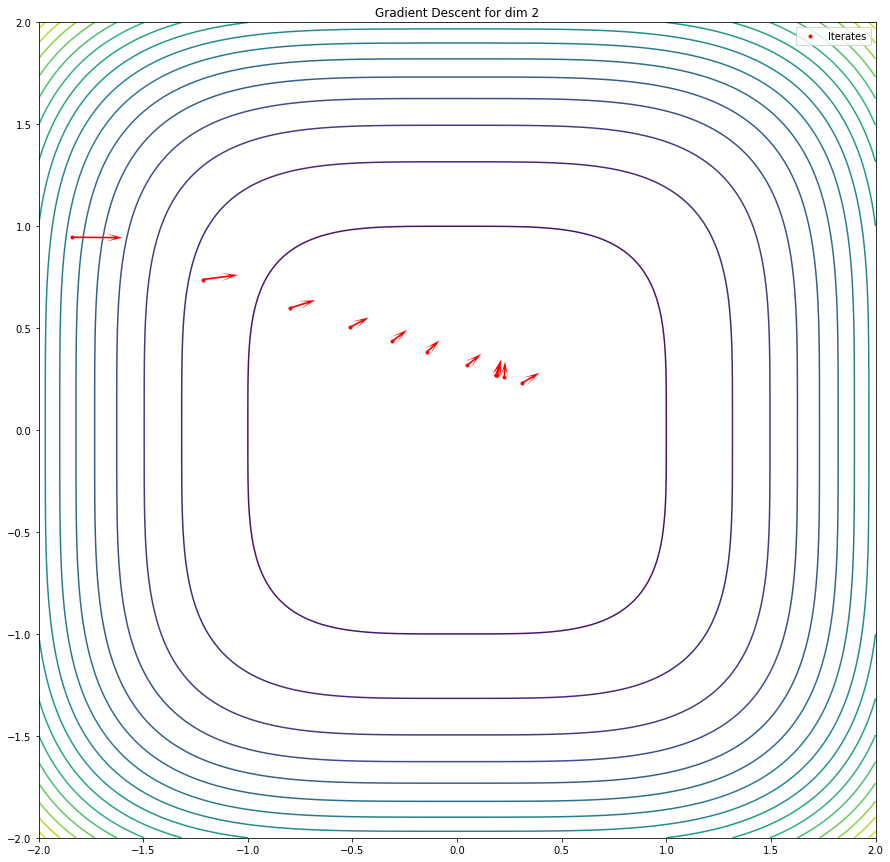

In [170]:
Newton = Newton_with_constraint()
Newton(quad_two4)

(array([[-6.33185171e-11],
        [ 6.66666667e-01]]), 12)

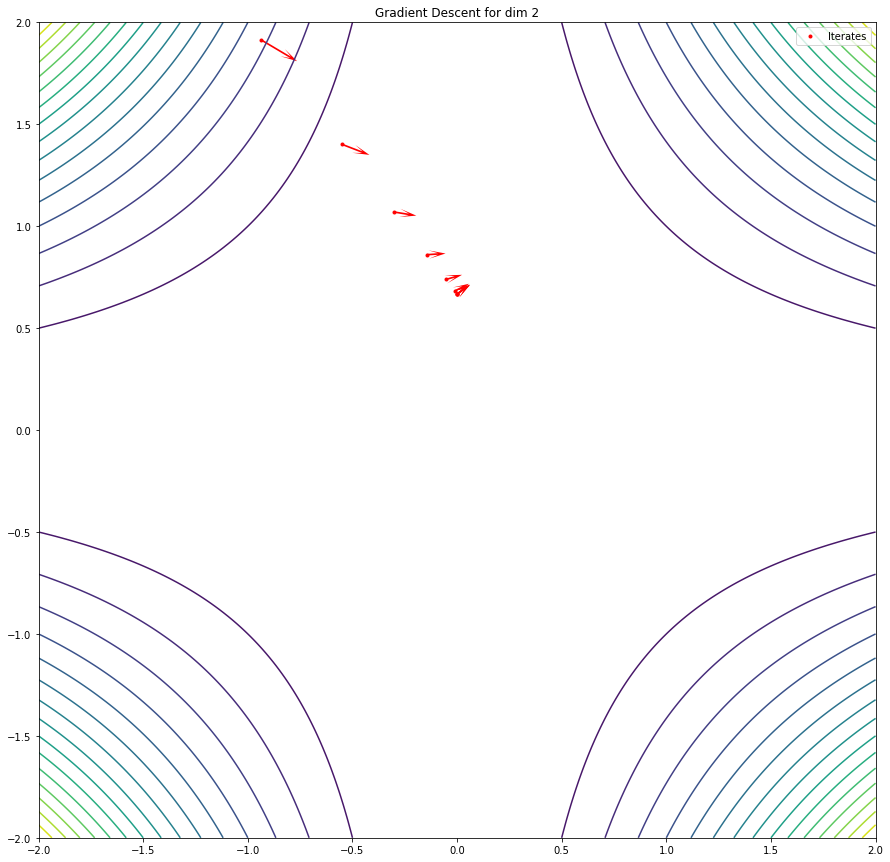

In [182]:
Newton(quad_two2)

(array([[0.20129267],
        [0.53247155]]), 9)

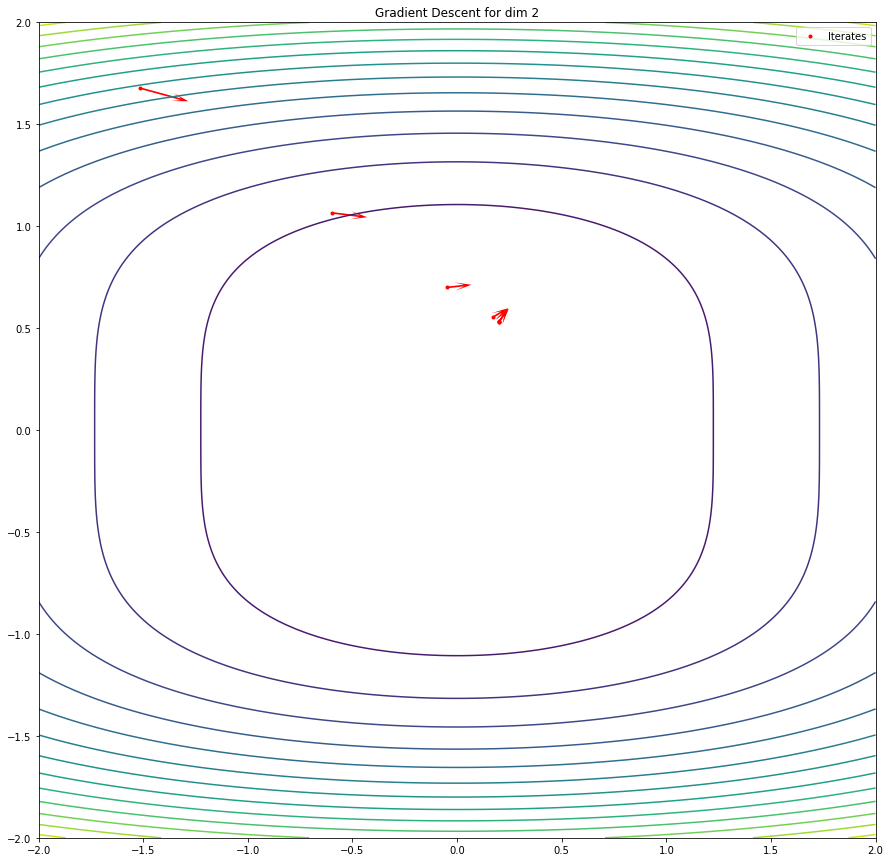

In [180]:
Newton = Newton_with_constraint()
Newton(quad_two5)

In [171]:
import pandas as pd
import inspect

def getinitPoint(nb_params):
    return np.ones(nb_params).reshape(nb_params,1)*3

def tostring(func):
    return inspect.getsourcelines(func)[0][0].split('x:')[1].split(',\n')[0]

GD_test_summary = pd.DataFrame(columns=["function","init_pt", "rate", "nb_iter","convexe", "optimal_pt"])

idt = 0
maX=1000
toL = 1e-6
def formater(x,nbparam):
    ret = "("
    for i in range(x.shape[0]- 1):
        ret += str(x[i])
        ret += ","
    ret+=   str(x[x.shape[0]- 1])
    ret += ")"
    return ret

for t_function in tests_with_constraint:
    nbparam = t_function.nb_params 
    initialPoint = getinitPoint(nbparam)
    rate = 0.01
    opt_pt,n_iter = Newton(t_function,viz = False) 
    GD_test_summary.loc[t_function.name] = pd.Series({"init_pt": formater(initialPoint,nbparam), 
                                                     "rate": rate, 
                                                      "function": tostring(t_function.value), 
                                                     "optimal_pt": formater(opt_pt.reshape(-1,1),nbparam), # point trouvé 
                                                     "nb_iter": n_iter,
                                                      "convexe": t_function.convex }) # nombre d'iteration
    idt += 1
    
GD_test_summary


function  \
quad_two_c                        (x[:,0]**2) + x[:,1]**2 + 1)   
quad_two_c2                           (x[:,0]**2) * x[:,1]**2)   
quad_two_nc                      (-x[:,0]**3) + x[:,1]**3 + 1)   
quad_two_c3                       (x[:,0]**4) + x[:,1]**4 + 3)   
quad_two_c4                           (x[:,0]**2) + x[:,1]**4)   
quad_two_c5                  ((x[:,0]-3)**2 + (x[:,1]- 4)**4))   
quad_two_c6                 x[:,0]**2 * x[:,1]**2 + x[:,0]**2)   
quad_two_c7                   (4*x[:,0]**4) + 3*x[:,1]**4 + 3)   
quad_two_c8           (x[:,0]**2 + x[:,1]**2 + x[:,2]**2 + 5))   
quad_two_c9   (2*x[:,0]**2 + 2*x[:,1]**2 + 2*x[:,2]**2 + 2*...   

                           init_pt  rate nb_iter convexe  \
quad_two_c             ([3.],[3.])  0.01       2    True   
quad_two_c2            ([3.],[3.])  0.01      12   False   
quad_two_nc            ([3.],[3.])  0.01    1000   False   
quad_two_c3            ([3.],[3.])  0.01      16    True   
quad_two_c4            ([3.],[3.])  0.01       9    True   
quad_two_c5            ([3.],[3.])  0.01      15    True   
quad_two_c6            ([3.],[3.])  0.01       9    True   
quad_two_c7            ([3.],[3.])  0.01      19    True   
quad_two_c8       ([3.],[3.],[3.])  0.01       2    True   
quad_two_c9  ([3.],[3.],[3.],[3.])  0.01       2    True   

                                                    optimal_pt  
quad_two_c                         ([0.30769231],[0.46153846])  
quad_two_c2                   ([-6.33185171e-11],[0.66666667])  
quad_two_nc                       ([2.44417908],[-1.88835815])  
quad_two_c3                        ([0.18773178],[0.27075607])  
quad_two_c4                        ([0.20129267],[0.53247155])  
quad_two_c5                          ([1.3706427],[3.2587146])  
quad_two_c6                           ([-5.55111512e-17],[1.])  
quad_two_c7                        ([0.09588586],[0.26027428])  
quad_two_c8           ([0.82352941],[1.23529412],[0.82352941])  
quad_two_c9  ([0.44444444],[0.66666667],[0.44444444],[0.222...

## Question 1-7. Comparer les deux méthodes précédentes.

In [178]:
import pandas as pd
import inspect




GD_test_summary = pd.DataFrame(columns=["gradient descent optimal_pt", "newton descent optimal_pt",
                                        "gradient descent iter_count", "newton descent iter_count"])

idt = 0
maX=1000
toL = 1e-6

GD = GDWithConstraint()
Newton = Newton_with_constraint()

for t_function in tests_with_constraint:
    nbparam = t_function.nb_params 
    initialPoint = getinitPoint(nbparam)
    opt_pt,n_iter = Newton(t_function,viz = False)   
    opt_pt2, _, _, n_iter2 = GD(t_function,viz = False)
    GD_test_summary.loc[t_function.name] = pd.Series({"gradient descent optimal_pt": formater(opt_pt2.reshape(-1,1),nbparam), # point trouvé 
                                                     "gradient descent iter_count": n_iter2,
                                                     "newton descent optimal_pt": formater(opt_pt.reshape(-1,1),nbparam), # point trouvé 
                                                     "newton descent iter_count": n_iter }) # nombre d'iteration
    idt += 1
    
GD_test_summary

/home/alae/.conda/envs/scia/lib/python3.7/site-packages/ipykernel_launcher.py:152: RuntimeWarning: overflow encountered in square


gradient descent optimal_pt  \
quad_two_c                          ([0.3076919],[0.46153873])   
quad_two_c2                       ([-0.00506704],[0.67342272])   
quad_two_nc                                     ([inf],[-inf])   
quad_two_c3                        ([0.15108087],[0.28297304])   
quad_two_c4                        ([0.20129234],[0.53247177])   
quad_two_c5                        ([1.37064263],[3.25871474])   
quad_two_c6                   ([-2.87866088e-07],[1.00000019])   
quad_two_c7                        ([0.09662677],[0.26022488])   
quad_two_c8           ([0.82352899],[1.23529426],[0.82352962])   
quad_two_c9  ([0.44444425],[0.66666671],[0.44444452],[0.222...   

                                     newton descent optimal_pt  \
quad_two_c                         ([0.30769231],[0.46153846])   
quad_two_c2                   ([-6.33185171e-11],[0.66666667])   
quad_two_nc                       ([2.44417908],[-1.88835815])   
quad_two_c3                        ([0.18773178],[0.27075607])   
quad_two_c4                        ([0.20129267],[0.53247155])   
quad_two_c5                          ([1.3706427],[3.2587146])   
quad_two_c6                           ([-5.55111512e-17],[1.])   
quad_two_c7                        ([0.09588586],[0.26027428])   
quad_two_c8           ([0.82352941],[1.23529412],[0.82352941])   
quad_two_c9  ([0.44444444],[0.66666667],[0.44444444],[0.222...   

            gradient descent iter_count newton descent iter_count  
quad_two_c                          774                         2  
quad_two_c2                        1000                        12  
quad_two_nc                        1000                      1000  
quad_two_c3                        1000                        16  
quad_two_c4                         600                         9  
quad_two_c5                         280                        15  
quad_two_c6                         515                         9  
quad_two_c7                        1000                        19  
quad_two_c8                         791                         2  
quad_two_c9                         414                         2

La méthode de Newton prend plus de temps à calculer, car il faut calculer le gradient et l'hessienne au voisinage de chaque point, elle converge en moins d'itération, par contre elle peut converger vers un minimum, un maximum, ou un point sel. 
La descente de gradient, elle converge toujours vers le minimum, mais en plus d'itération, elle est plus rapide, car on calcule que le gradient. Par contre elle est très sensible au point initial quand le problème n'est pas convexe.

#### 1.1.3 Bibliographie
##### Question 1-8. Qu’est-ce qu’une méthode de Quasi-Newton ?
Une méthode de Quasi-Newton permet d'éviter les calculs coûteux de la méthode de Newton en ayant des résulats similaires. La méthode de Newton est couteûse à cause du calcul de la hessienne. Plus la dimension n de départ de la fonction f est grand plus le calcul de la hessienne  sera long. Pour éviter cela, on remplace la hessienne par une matrice plus simple à calculer Mk. 
    On se retrouve ainsi avec une nouvelle formule: $$x_{k+1} = x_k -a_kM_k \cdot Df(x)$$ avec a_k un coefficient qui est rajouter pour optimiser la convergence. </br>     
La matrice M_k est mis à jour à chaque itération pour correspondre le plus possible à la matrice hessienne. L'initialisation et la mise à jour à chaque itération de la matrice Mk dépend de la méthode de Quasi-Newton utilisée.